<a href="https://colab.research.google.com/github/CodesbyHim/Data-Analysis-Projects/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Play** **Store** **App** **Review** **Analysis**

Import necessary libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Load the dataset

In [46]:
file_path = 'Training_Data_Google_Play_reviews_6000.xlsx'
data = pd.read_excel(file_path)

Display the first few rows of the dataset

In [47]:
print(data.head())

                               reviewId           userName  \
0  495266a4-f451-48c3-a844-fb3c07560d55     Foysal Hossain   
1  947fcd83-7a28-403d-b03b-d0bc20f52e0e          S K VERMA   
2  65856211-67ba-4560-84dd-a0055775ed90      Amanuel Abara   
3  cd5ba250-3a26-43b4-a378-77d18f73a503  Vagarangas X Aopi   
4  e8e886b4-d6c6-416b-b0a1-be90320c4024       Shafin islam   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a/ACg8oc...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                               content  score  thumbsUpCount  \
0  Gett van for no reason ðŸ˜‚ðŸ˜‚ðŸ˜‚      1              0   
1                better' than WhatsApp      4              0   
2             That was good app for me      5              0   
3                         Love the

 Handling missing values

In [48]:
data = data.dropna(subset=['content', 'score'])

Remove duplicates

In [49]:
data = data.drop_duplicates()

#Data Analysis

Display cleaned data

In [50]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5998 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              5998 non-null   object        
 1   userName              5998 non-null   object        
 2   userImage             5998 non-null   object        
 3   content               5998 non-null   object        
 4   score                 5998 non-null   int64         
 5   thumbsUpCount         5998 non-null   int64         
 6   reviewCreatedVersion  4394 non-null   object        
 7   at                    5998 non-null   datetime64[ns]
 8   replyContent          191 non-null    object        
 9   repliedAt             191 non-null    datetime64[ns]
 10  appVersion            4394 non-null   object        
 11  userLang              5998 non-null   object        
 12  app_id                5998 non-null   object        
dtypes: datetime64[ns](2), i

Distribution analysis

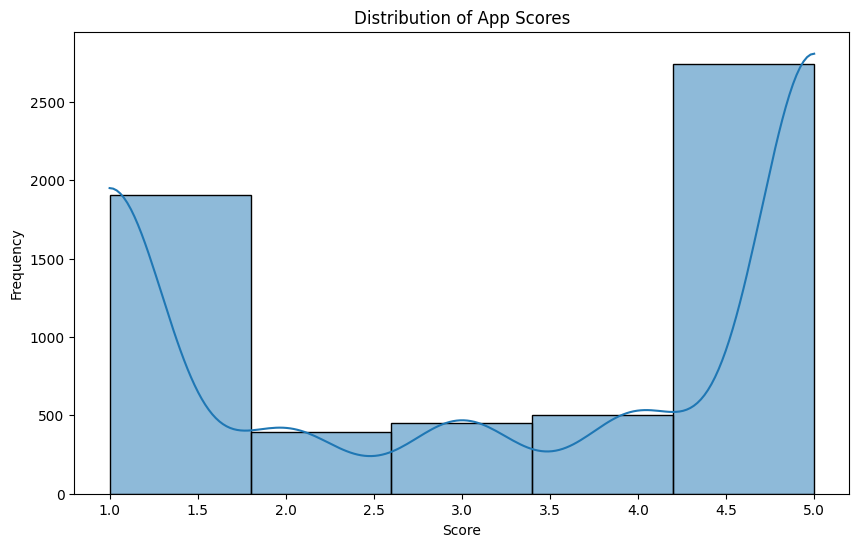

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data['score'], kde=True, bins=5)
plt.title('Distribution of App Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Thumbs up count analysis

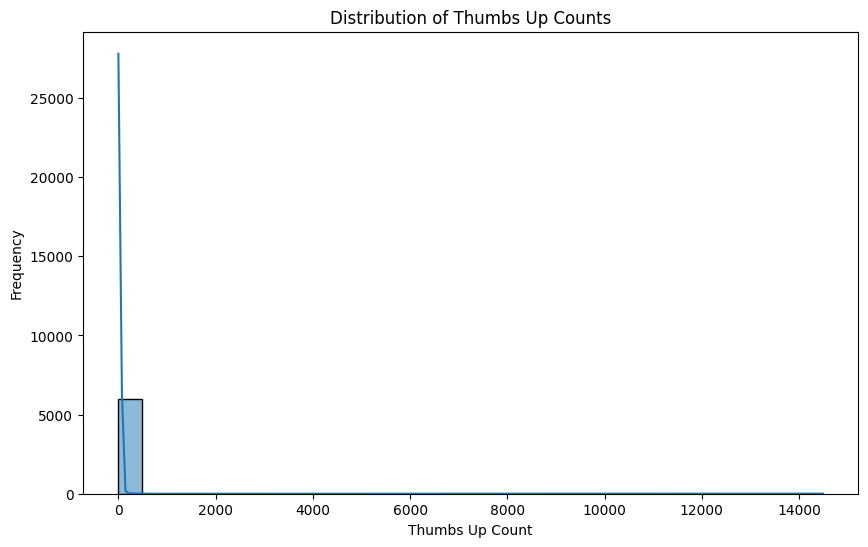

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(data['thumbsUpCount'], kde=True, bins=30)
plt.title('Distribution of Thumbs Up Counts')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Frequency')
plt.show()

#Sentiment Analysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


sentiment
Neutral     4010
Positive    1603
Negative     385
Name: count, dtype: int64


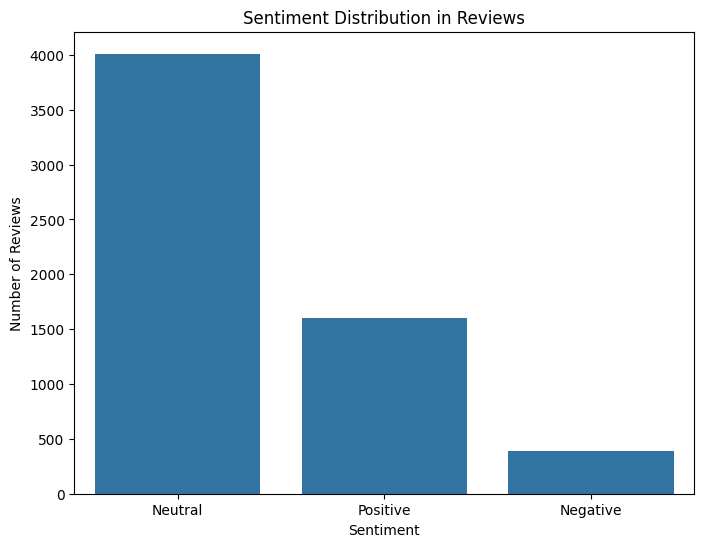

In [53]:
# Download necessary NLTK data
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Assuming data is your DataFrame and 'content' is the column with reviews
# Convert all entries in the 'content' column to strings
data['content'] = data['content'].astype(str)

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_text)

data['cleaned_content'] = data['content'].apply(preprocess_text)

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['cleaned_content'].apply(get_sentiment)
print(data['sentiment'].value_counts())

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Key Insights and Predictive Analysis

In [54]:
# Filter numeric columns
numeric_data = data.select_dtypes(include=[np.number])
numeric_data = numeric_data.dropna()

Correlation analysis

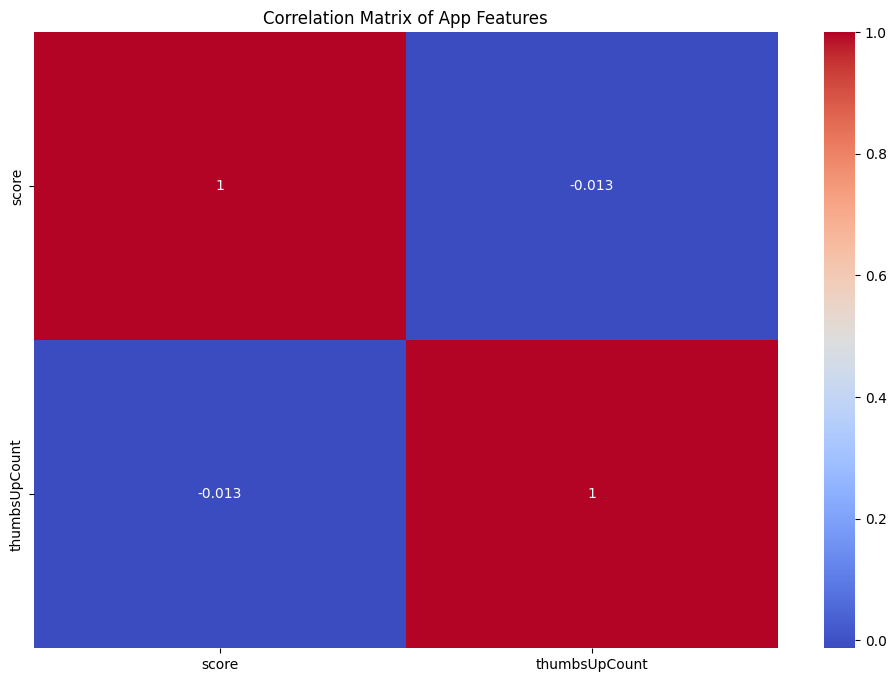

In [55]:
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of App Features')
plt.show()

Engagement metrics

In [56]:
data['score'] = pd.to_numeric(data['score'], errors='coerce')

In [57]:
high_rating_reviews = data[data['score'] >= 4]
print("High Rating Reviews:")
print(high_rating_reviews.head())

High Rating Reviews:
                               reviewId           userName  \
1  947fcd83-7a28-403d-b03b-d0bc20f52e0e          S K VERMA   
2  65856211-67ba-4560-84dd-a0055775ed90      Amanuel Abara   
3  cd5ba250-3a26-43b4-a378-77d18f73a503  Vagarangas X Aopi   
5  f189360d-494a-41cf-923a-4d9388d01d49    Ali ishrak Arko   
6  f88b4087-5944-44dd-b4c6-33431f3e8b2b    loljustplayplay   

                                           userImage  \
1  https://play-lh.googleusercontent.com/a/ACg8oc...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
5  https://play-lh.googleusercontent.com/a-/ALV-U...   
6  https://play-lh.googleusercontent.com/a/ACg8oc...   

                    content  score  thumbsUpCount reviewCreatedVersion  \
1     better' than WhatsApp      4              0                  NaN   
2  That was good app for me      5              0                  NaN   
3              Love the app      5             

 # Visualization

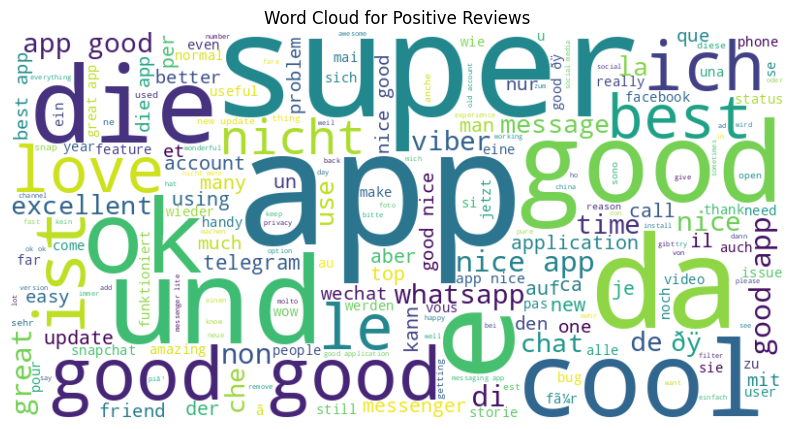

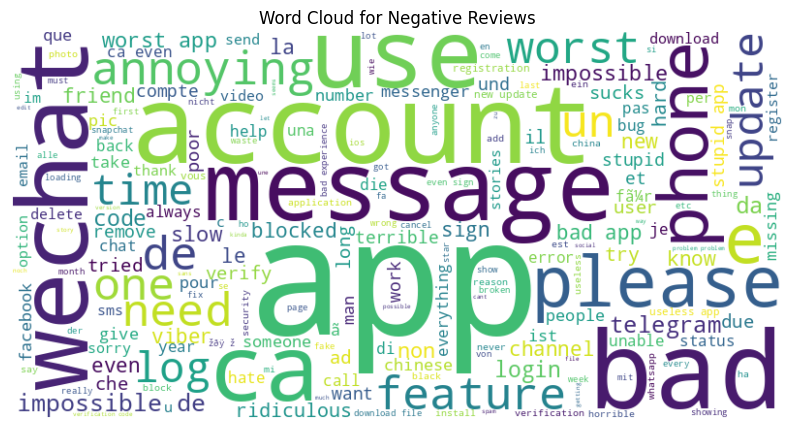

In [58]:
# Word cloud for positive reviews
from wordcloud import WordCloud

positive_reviews = ' '.join(data[data['sentiment'] == 'Positive']['cleaned_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Word cloud for negative reviews
negative_reviews = ' '.join(data[data['sentiment'] == 'Negative']['cleaned_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()
